# Some other features in Bayesian inference

| | | |
|-|-|-|
|[ ![Creative Commons License](images/cc4.png)](http://creativecommons.org/licenses/by-nc/4.0/) |[ ![aGrUM](images/logoAgrum.png)](https://agrum.org) |[ ![interactive online version](images/atbinder.svg)](https://agrum.gitlab.io/extra/agrum_at_binder.html)

Lazy Propagation uses a secondary structure called the "Junction Tree" to perform the inference.

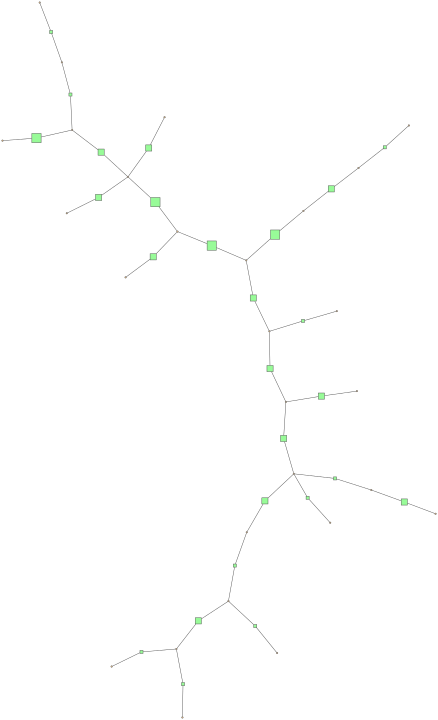

In [1]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

bn=gum.loadBN("res/alarm.dsl")
gnb.showJunctionTreeMap(bn);

But this junction tree can be transformed to build different probabilistic queries.

In [2]:
bn=gum.fastBN("A->B->C->D;A->E->D;F->B;C->H")
ie=gum.LazyPropagation(bn)
bn              

(pyAgrum.BayesNet<double>@0x13005f000) BN{nodes: 7, arcs: 7, domainSize: 128, dim: 16, mem: 256o}

## Evidence impact 
Evidence Impact allows the user to analyze the effect of any variables on any other variables

In [3]:
ie.evidenceImpact("B",["A","H"])

(pyAgrum.Potential<double>@0x6000026dbba0) 
             ||  B                |
H     |A     ||0        |1        |
------|------||---------|---------|
0     |0     || 0.3782  | 0.6218  |
1     |0     || 0.3257  | 0.6743  |
0     |1     || 0.3924  | 0.6076  |
1     |1     || 0.3390  | 0.6610  |

Evidence impact is able to find the minimum set of variables which effectively conditions the analyzed variable

In [4]:
ie.evidenceImpact("E",["A","F","B","D"]) # {A,D,B} d-separates E and F

(pyAgrum.Potential<double>@0x6000026d4900) 
                    ||  E                |
D     |B     |A     ||0        |1        |
------|------|------||---------|---------|
0     |0     |0     || 0.5926  | 0.4074  |
1     |0     |0     || 0.7711  | 0.2289  |
0     |1     |0     || 0.5753  | 0.4247  |
1     |1     |0     || 0.7764  | 0.2236  |
0     |0     |1     || 0.3576  | 0.6424  |
1     |0     |1     || 0.5632  | 0.4368  |
0     |1     |1     || 0.3413  | 0.6587  |
1     |1     |1     || 0.5706  | 0.4294  |

In [5]:
ie.evidenceImpact("E",["A","B","C","D","F"]) # {A,C,D} d-separates E and {B,F}

(pyAgrum.Potential<double>@0x6000026d4a20) 
                    ||  E                |
D     |A     |C     ||0        |1        |
------|------|------||---------|---------|
0     |0     |0     || 0.4082  | 0.5918  |
1     |0     |0     || 0.8117  | 0.1883  |
0     |1     |0     || 0.2088  | 0.7912  |
1     |1     |0     || 0.6225  | 0.3775  |
0     |0     |1     || 0.5969  | 0.4031  |
1     |0     |1     || 0.7698  | 0.2302  |
0     |1     |1     || 0.3616  | 0.6384  |
1     |1     |1     || 0.5613  | 0.4387  |

## Evidence Joint Impact

In [6]:
ie.evidenceJointImpact(["A","F"],["B","C","D","E","H"]) # {B,E} d-separates [A,F] and [C,D,H]

(pyAgrum.Potential<double>@0x6000026a6100) 
                    ||  A                |
F     |B     |E     ||0        |1        |
------|------|------||---------|---------|
0     |0     |0     || 0.7516  | 0.0473  |
1     |0     |0     || 0.1495  | 0.0515  |
0     |1     |0     || 0.2069  | 0.0400  |
1     |1     |0     || 0.6994  | 0.0536  |
0     |0     |1     || 0.6482  | 0.1067  |
1     |0     |1     || 0.1290  | 0.1161  |
0     |1     |1     || 0.1798  | 0.0909  |
1     |1     |1     || 0.6076  | 0.1217  |